In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno
import os
import sys
import warnings
from ydata_profiling import ProfileReport


warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("../data/train-data.csv")
df.head(15)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
pd.options.display.float_format = '{:,.1f}'.format
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,"6,019.0","6,019.0","6,019.0","5,977.0","6,019.0"
mean,"3,009.0","2,013.4","58,738.4",5.3,9.5
std,"1,737.7",3.3,"91,268.8",0.8,11.2
min,0.0,"1,998.0",171.0,0.0,0.4
25%,"1,504.5","2,011.0","34,000.0",5.0,3.5
50%,"3,009.0","2,014.0","53,000.0",5.0,5.6
75%,"4,513.5","2,016.0","73,000.0",5.0,9.9
max,"6,018.0","2,019.0","6,500,000.0",10.0,160.0


In [5]:
df.describe(include='O') # Describs of the String info

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [6]:

# Create reports directory if it doesn't exist
os.makedirs("../reports", exist_ok=True)

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("../reports/first-exploration.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 29.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
pd.options.display.float_format = '{:,.3f}'.format
df.isnull().mean() *100 # It finds the number of null values in each column then it divides by the total number of rows and multiplies by 100 to get the percentage

Unnamed: 0           0.000
Name                 0.000
Location             0.000
Year                 0.000
Kilometers_Driven    0.000
Fuel_Type            0.000
Transmission         0.000
Owner_Type           0.000
Mileage              0.033
Engine               0.598
Power                0.598
Seats                0.698
New_Price           86.310
Price                0.000
dtype: float64

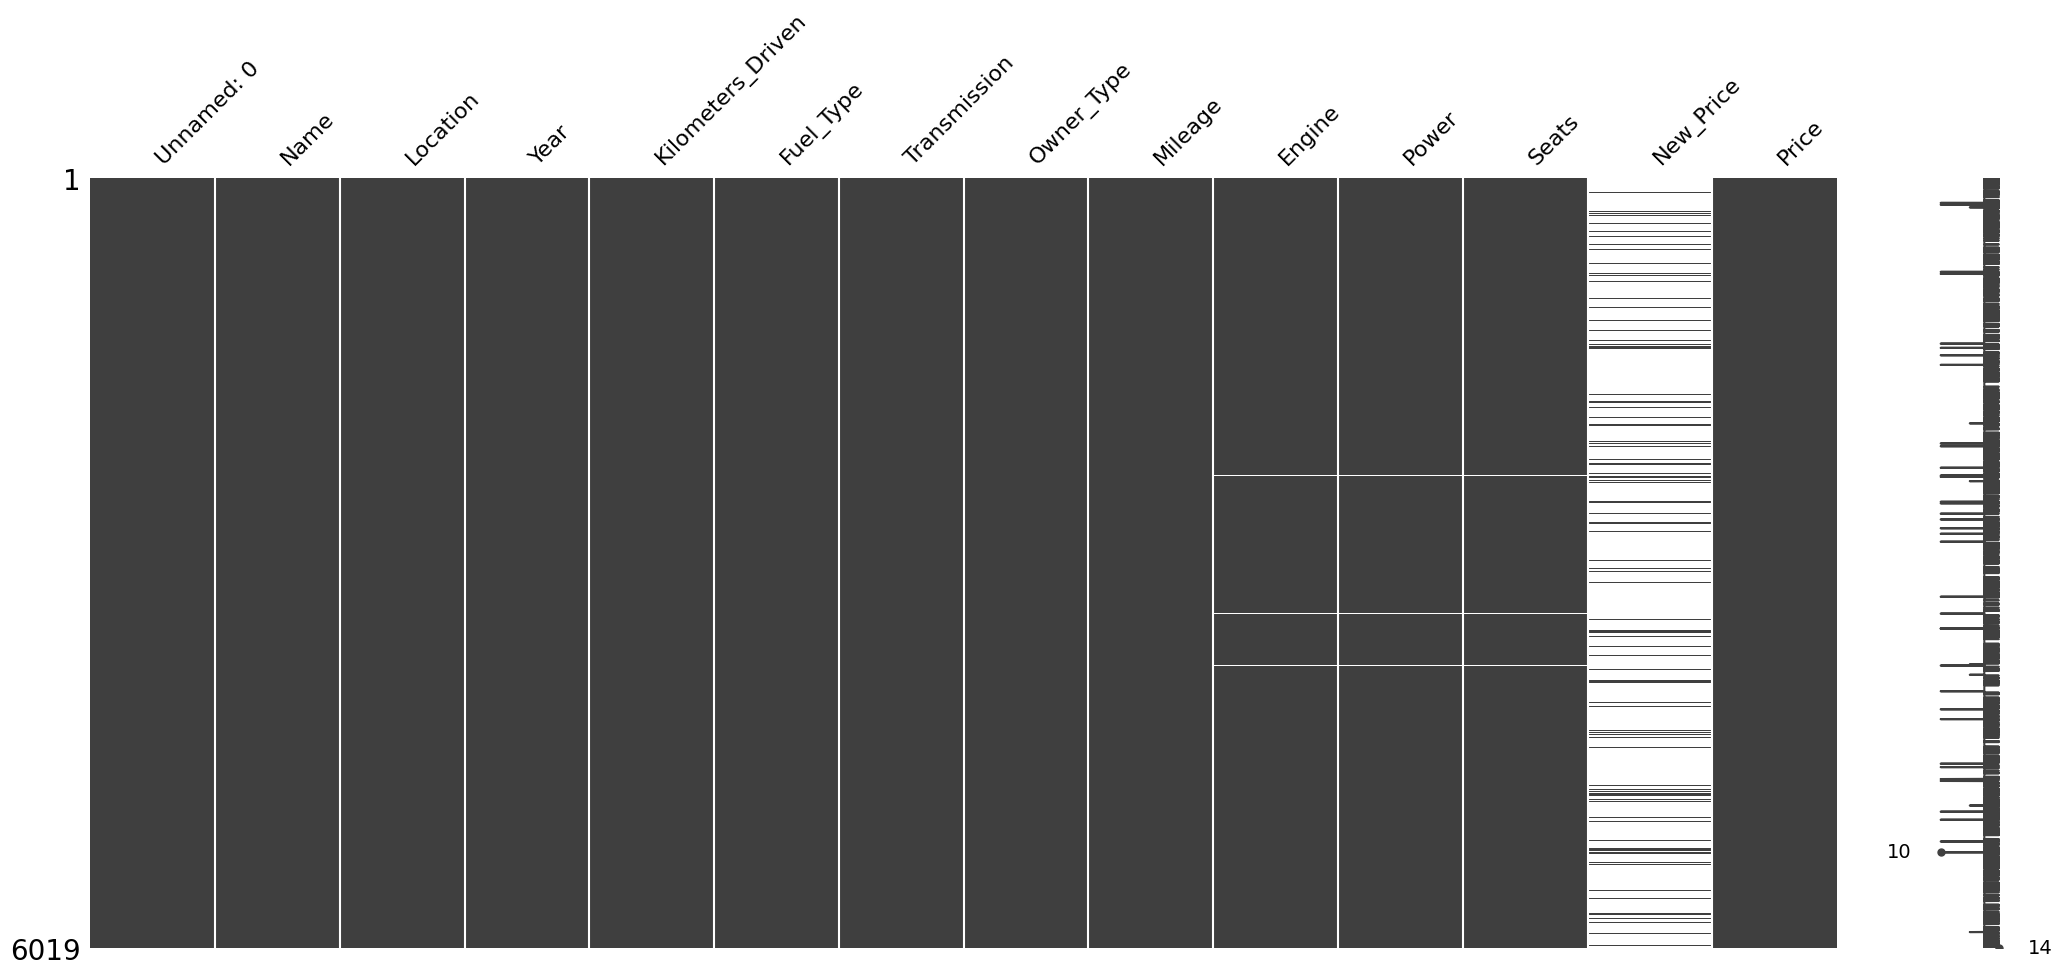

In [9]:
msno.matrix(df)
plt.show()

<Axes: >

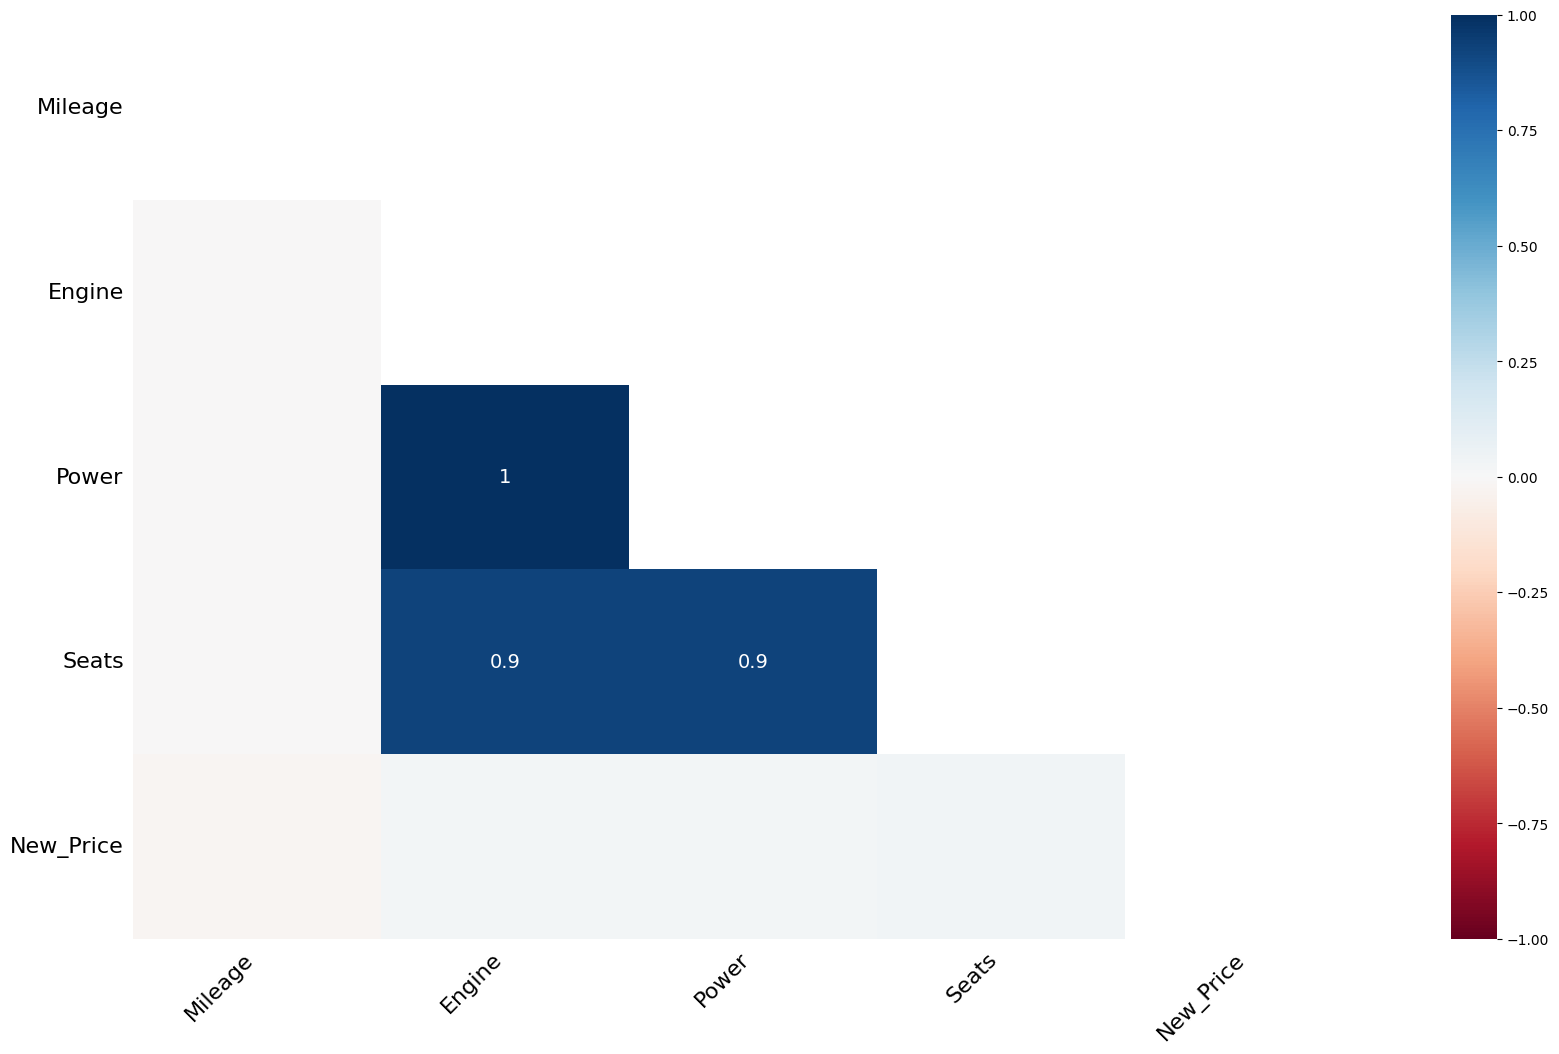

In [10]:
msno.heatmap(df)

In [11]:
df.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740


In [12]:
# Now needed to drop the useless columns like Unnamed: 0 
df.drop(columns=['Unnamed: 0'], inplace=True)
# df.head(5)

In [13]:
# Find the number of null values in the New_Price column
# df['New_Price'].isnull().sum()
print(f"The percentage of missing values in New_price column {df['New_Price'].isnull().sum()/df.shape[0] *100}")


The percentage of missing values in New_price column 86.31001827546105


In [14]:
df.drop(columns=['New_Price'], inplace=True) # Drop the New_Price column because it has 55% null values
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,1.750
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,12.500
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,4.500
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,6.000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,17.740


In [15]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

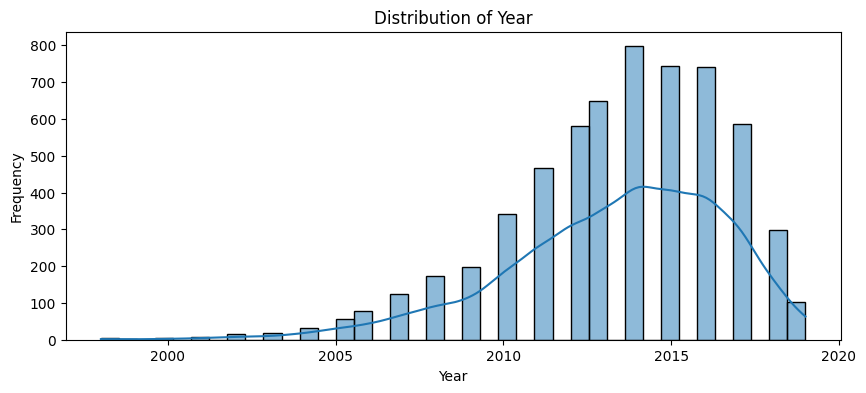

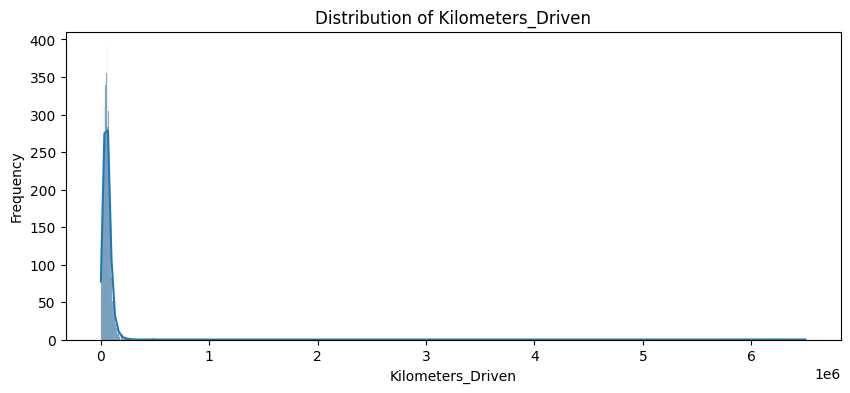

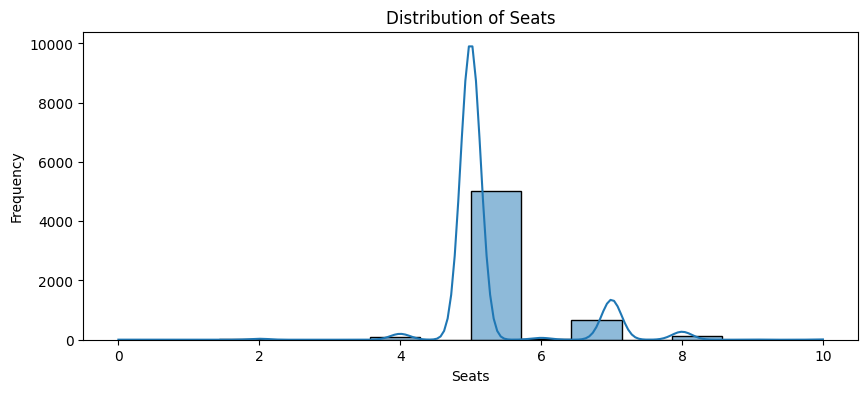

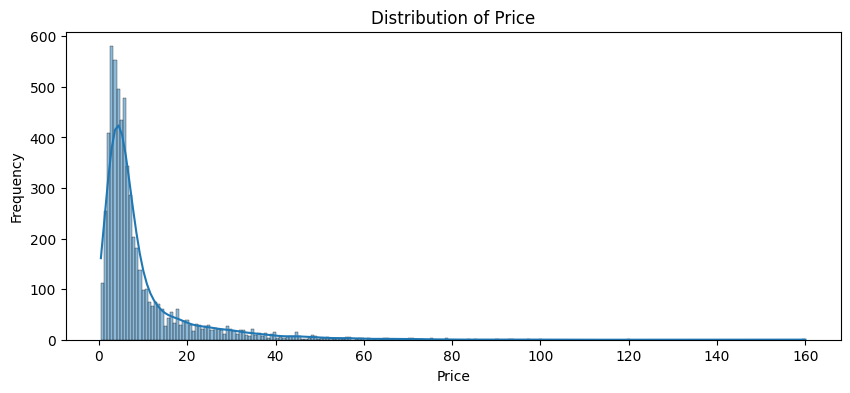

In [16]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    fig=px.histogram(df, x=col, title=f'Distribution of {col}')
    fig.show()


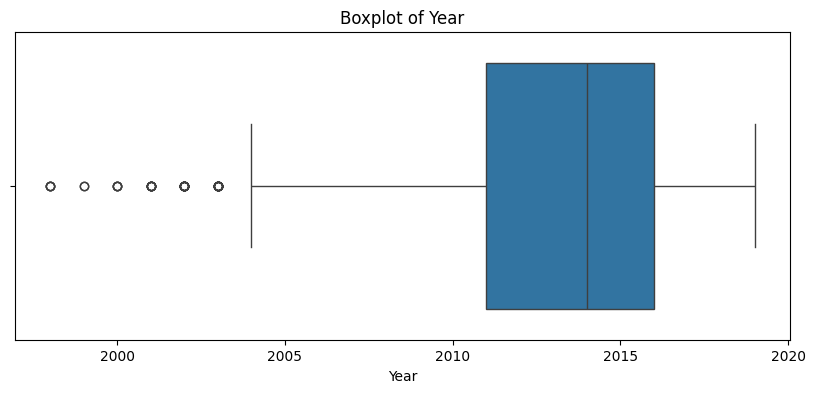

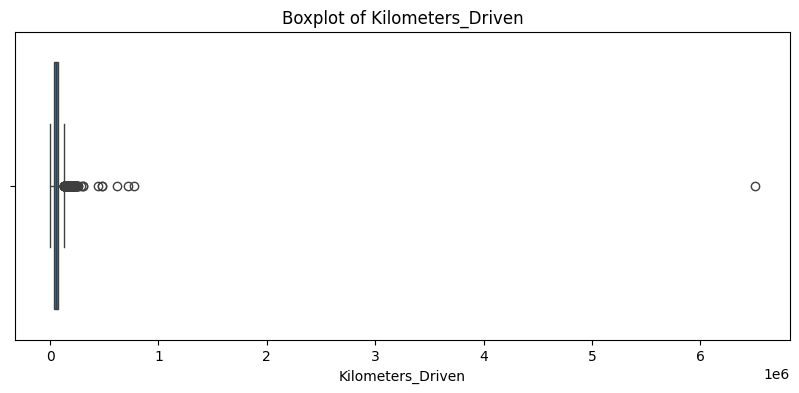

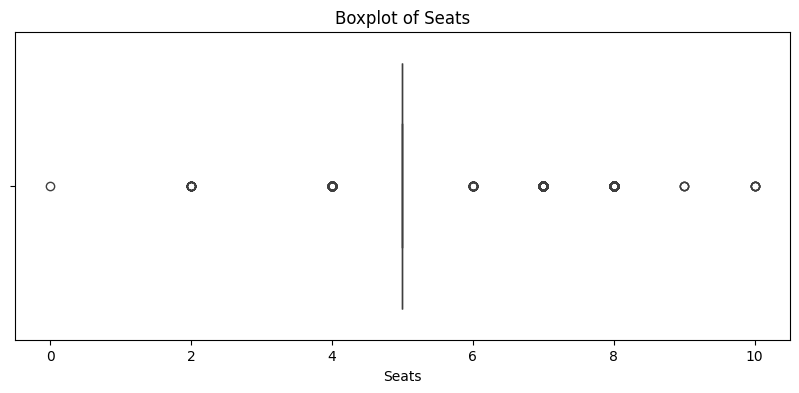

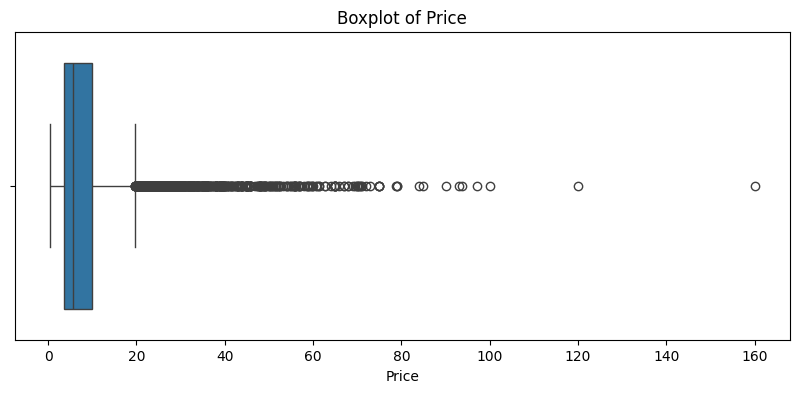

In [17]:
# find Outliers using boxplot
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()
    fig=px.box(df, x=col, title=f'Boxplot of {col}')
    fig.show()

In this exploratory data analysis (EDA) process, we performed a comprehensive examination of the used cars dataset to understand its structure, quality, and key characteristics:

1. **Data Loading & Initial Inspection:**  
    - Loaded the dataset and displayed the first few rows to get an overview of the data.
    - Checked the data types, column names, and the number of entries using `df.info()`.

2. **Descriptive Statistics:**  
    - Generated summary statistics for numerical columns (`df.describe()`) and categorical columns (`df.describe(include='O')`).
    - Adjusted the display format for better readability.

3. **Data Profiling:**  
    - Created an automated profiling report using `ydata_profiling` to summarize distributions, correlations, and potential data quality issues.

4. **Missing Values & Duplicates:**  
    - Identified and quantified missing values both as counts and percentages.
    - Visualized missing data patterns using `missingno` matrix and heatmap.
    - Checked for duplicate rows.

5. **Data Cleaning:**  
    - Dropped unnecessary columns (e.g., 'Unnamed: 0').
    - Removed columns with excessive missing values (e.g., 'New_Price').

6. **Feature Categorization:**  
    - Identified numerical and categorical columns for further analysis.

7. **Univariate Analysis:**  
    - Visualized distributions of numerical features using histograms and KDE plots (with both seaborn and plotly for interactivity).
    - Examined outliers using boxplots.

8. **Dataset Overview:**  
    - The cleaned dataset contains 6019 rows and 12 columns, with features such as car name, location, year, kilometers driven, fuel type, transmission, owner type, mileage, engine, power, seats, and price.

This EDA phase provided valuable insights into the dataset's structure, highlighted data quality issues, and set the foundation for further analysis and modeling.
